# 1.4 Polinomios de Taylor y diferenciación numérica

Este libro es para la parte de código de la [sección 1.6 de las notas](https://itam-ds.github.io/analisis-numerico-computo-cientifico/1.computo_cientifico/1.6/Polinomios_de_Taylor_y_diferenciacion_numerica.html)

## Diferencas Finitas

**Ejemplo**:
<br>Realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la primera derivada de 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Función de interés
def F(x): return np.exp(-x)

#Aprox. derivada x difs. finitas adelante
def approx_first_der(f, x, h):  return ( f(x+h) - f(x) )/h

In [3]:
#Diccionario para almacenar derivadas
dif_adela = {'h': [],
            'd_1': []}

#Vector de h's: [1e-1, 1e-16]
for i in range(1,17):
    dif_adela['h'].append(math.pow(10, -i))
    
dif_adela['h'][:5]

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [4]:
#Evaluando difs. finitas en torno a x=1
x = 1
for i in dif_adela['h']:
    dif_adela['d_1'].append(approx_first_der(F,x,i))
    
dif_adela['d_1'][:5]

[-0.35008357473362783,
 -0.3660461599919007,
 -0.3676955627487377,
 -0.36786104781250106,
 -0.36787760178125234]

In [5]:
#Valor objetivo
obj = -np.exp(-x)

#Convirtiendo a DataFrame y evaluando error
dif_adela = pd.DataFrame(dif_adela)
dif_adela['rel_err'] = np.abs((dif_adela['d_1'] - obj)) / np.abs(obj)

print("En x=1:\n")
dif_adela

En x=1:



,h,d_1,rel_err
0,1.000000e-01,-0.350084,4.837418e-02
1,1.000000e-02,-0.366046,4.983375e-03
2,1.000000e-03,-0.367696,4.998334e-04
3,1.000000e-04,-0.367861,4.999833e-05
4,1.000000e-05,-0.367878,4.999981e-06
5,1.000000e-06,-0.367879,5.000218e-07
6,1.000000e-07,-0.367879,4.929857e-08
7,1.000000e-08,-0.367879,8.556935e-09
8,1.000000e-09,-0.367880,1.725170e-07
9,1.000000e-10,-0.367880,4.743069e-07


### Graficando el error

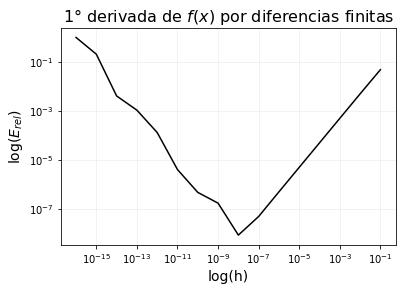

In [6]:
plt.plot(dif_adela['h'], dif_adela['rel_err'], color='black')

#Anotaciones y estilo
plt.title("1° derivada de $f(x)$ por diferencias finitas", fontsize=16)
plt.xlabel('log(h)', fontsize=14)
plt.ylabel('log($E_{rel}$)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.2)

plt.show()

**Ejemplo**:
<br> Aproximar...

In [7]:
import sympy